In [165]:
import polars as pl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [190]:
df = pl.read_csv("RUST_C_DIRECT_BENCHMARK_PRES_S5.csv")
df_column_names = df.columns[:]

In [191]:
INITIAL_TEST_MEAN_ONLY_US = df.select(pl.mean("RUST", "C", "R_OOB", "R_PTR"))

# column->mean map
column_to_mean = dict(zip(df_column_names, INITIAL_TEST_MEAN_ONLY_US.rows()[0]))

# Re-order:
INITIAL_TEST_MEAN_ONLY = INITIAL_TEST_MEAN_ONLY_US.select(sorted(column_to_mean, key=lambda x : column_to_mean[x]))
INITIAL_TEST_MEAN_ONLY

R_OOB,C,RUST,R_PTR
f64,f64,f64,f64
8.2574,8.658554,9.0556,10.2689


In [192]:
REAL_LABELS = {
    "RUST": "Rust (Full)",
    "C": "C",
    "R_OOB": "Rust (No Out-of-Bounds Checks)",
    "R_PTR": "Rust (Raw Pointers)",
}

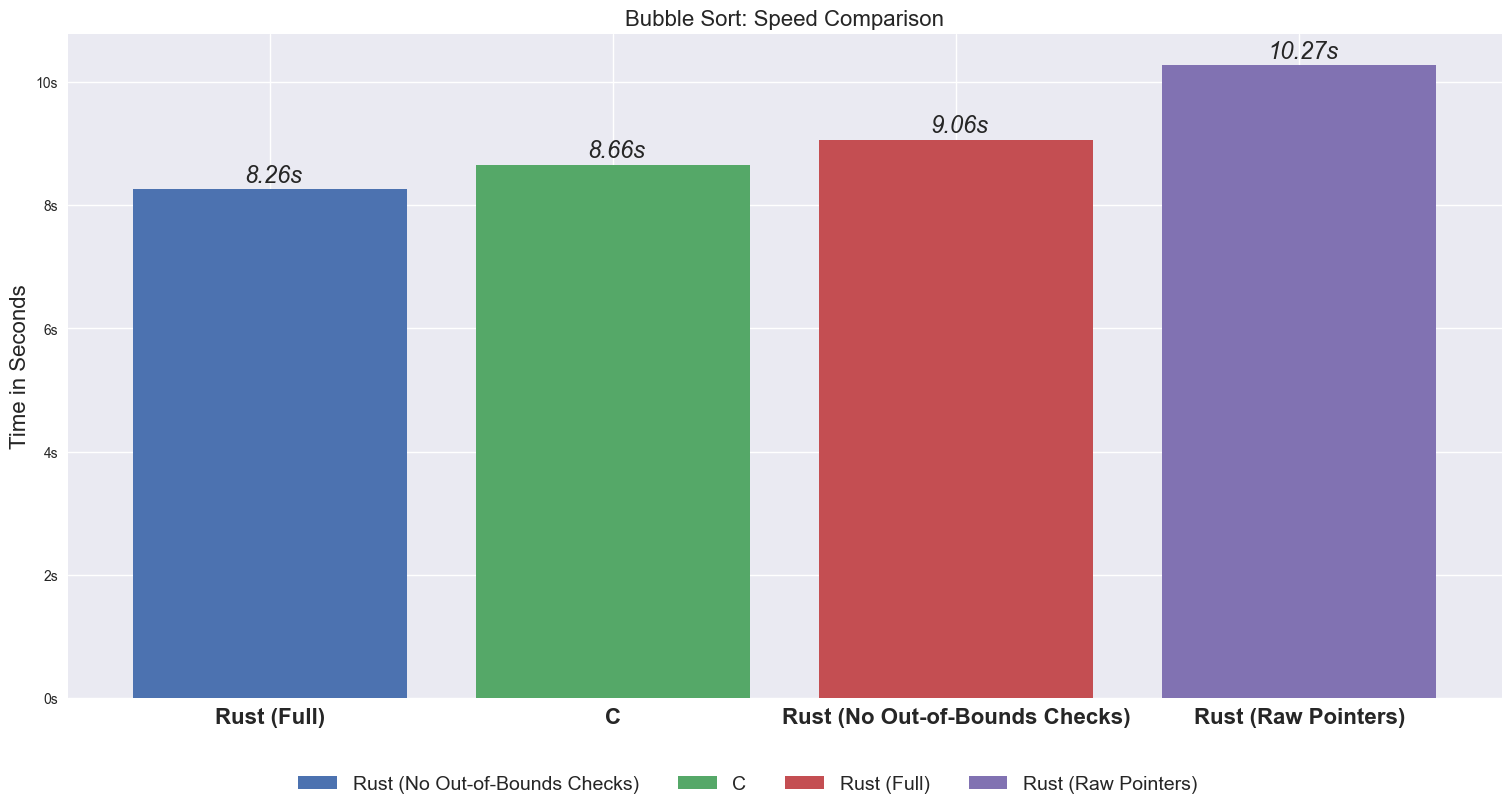

In [193]:
plt.rcParams.update({'font.size': 22})

x = np.arange(len(INITIAL_TEST_MEAN_ONLY.columns))
width = 0.25
m = 0
plt.style.use('seaborn-v0_8')

fig = plt.figure(figsize=(15,8), layout="constrained")
ax = fig.add_subplot()

C_FULL_VAL = INITIAL_TEST_MEAN_ONLY["C"][0]
for i, col in enumerate(INITIAL_TEST_MEAN_ONLY.columns):
    bar = ax.bar(i, INITIAL_TEST_MEAN_ONLY[col][0], label=REAL_LABELS[col])
    value = INITIAL_TEST_MEAN_ONLY[col][0]

    # C is not annotated:
    if 1:
        # Get percentage difference:
        diff = round((abs(C_FULL_VAL-value) / ((C_FULL_VAL+value)/2)) * 100.0)

        percentage = ax.annotate("%.2fs" % INITIAL_TEST_MEAN_ONLY[col][0], xy=(i + 0.01, INITIAL_TEST_MEAN_ONLY[col][0] + 0.119))
        # percentage = ax.annotate(str(diff) + "%", xy=(i + 0.01, INITIAL_TEST_MEAN_ONLY[col][0] + 0.119))
        percentage.set_horizontalalignment("center")
        percentage.set_fontsize(17)
        percentage.set_fontstyle("italic")

ax.set_ylabel("Time in Seconds", fontsize=16)
ax.set_title("Bubble Sort: Speed Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(list(REAL_LABELS.values()), fontsize=16, fontweight="bold")
ax.yaxis.set_major_formatter(FormatStrFormatter("%ds"))
ax.legend(loc="upper right", frameon=1)
plt.legend(bbox_to_anchor=(0.8, -0.09), ncol=4, fontsize=14)


# 

In [189]:
# rust/isolated_example/main.rs
wdf = pl.read_csv("test_ie.csv")

FileNotFoundError: The system cannot find the file specified. (os error 2): test_ie.csv

In [142]:
wdf

WFI,WFUI,WF,WFU
f64,f64,f64,f64
1.0,2.0,3.0,4.0
0.9,1.9,2.9,3.9
0.8,1.8,2.8,3.8


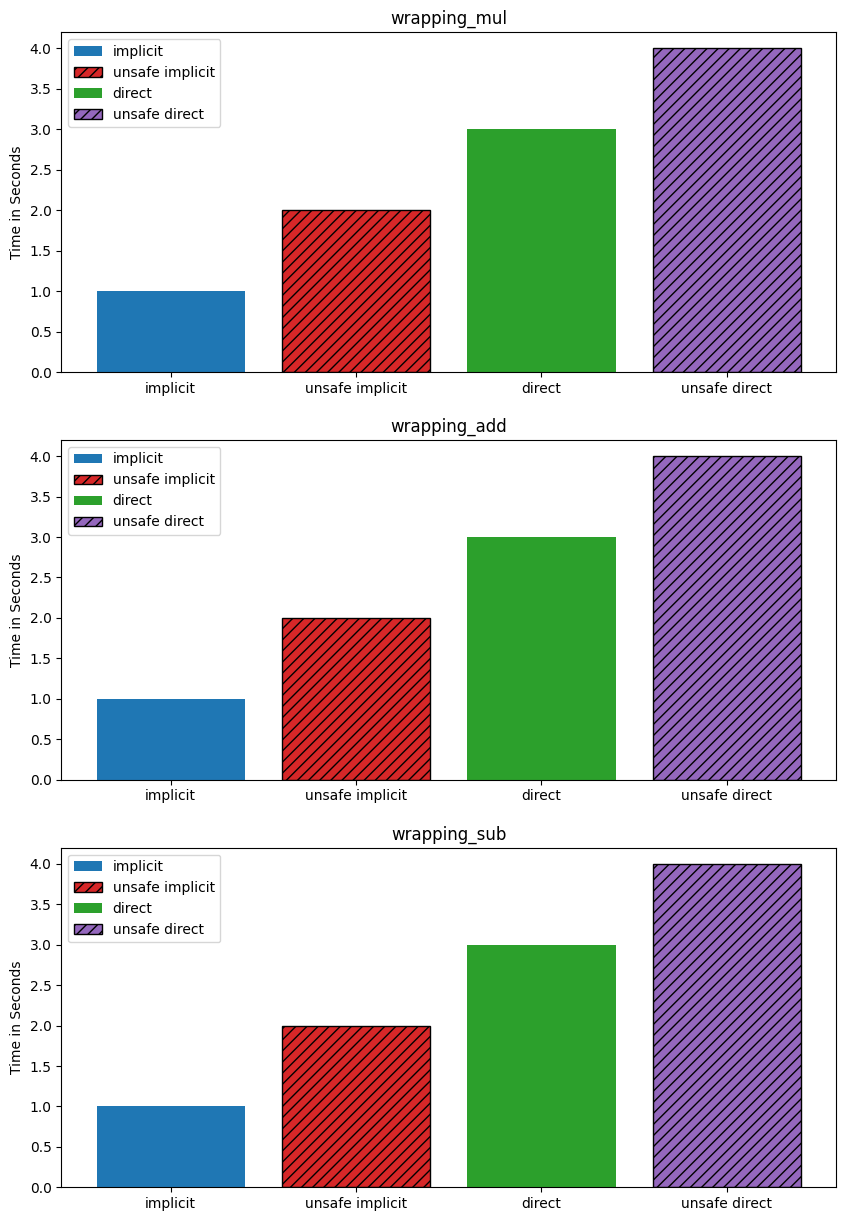

In [261]:
x = np.arange(len(df.columns))
m = 0

# fig = plt.figure(figsize=(15,7))
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# Rows are:
rows = ["wrapping_mul", "wrapping_add", "wrapping_sub"]

# Column names:
WDF_NAMES = {
    "WFI": "implicit",
    "WFUI": "unsafe implicit",
    "WF": "direct",
    "WFU": "unsafe direct",
}

bar_colors = [
    "tab:blue",
    "tab:red",
    "tab:green",
    "tab:purple",
]

for i, row in enumerate(rows):
    ax = axes[i]
    for j, col in enumerate(wdf.columns):
        bar = ax.bar(j, wdf[col][0], label=WDF_NAMES[col], color=bar_colors[j])

        # Unsafe gets hatching:
        if (j % 2 != 0):
            bar.patches[0].set_hatch("///")
            bar.patches[0].set_edgecolor("black")

    ax.set_ylabel("Time in Seconds")
    ax.set_xticks(np.arange(len(wdf.columns)))
    ax.set_xticklabels(list(WDF_NAMES.values()))
    ax.legend()
    ax.set_title(row)